|<img src="logoL.png", width="400"/> | <img src="logoR.png", width="400"/>|
|:---:|:----:|
|Centro Nacional de Alta Tecnología | Colaboratorio Nacional de Computación Avanzada|
|www.cenat.ac.cr | cnca@cenat.ac.cr|


# Kabré Usage Tutorial

Kabré is a word from Ngäbe Language which means *a bunch*. This fits the current cluster composition, which features multiple parallel architectures. Through this tutorial you will learn how Kabré is composed, how to connect to the cluster, submit jobs, retrieve results and about environment modules. 

### Requirements

To complete this tutorial you will require a ssh client. In Unix and Linux platforms, there is commonly a terminal emulator capable of establishing ssh sessions. In Windows plataforms you should download a ssh client programm, like Putty or simmilar. 

Also, you will requiere an active account in Kabré and valid credentials. If you don't have one, please contact us at cnca@cenat.ac.cr, explaining your situation. 

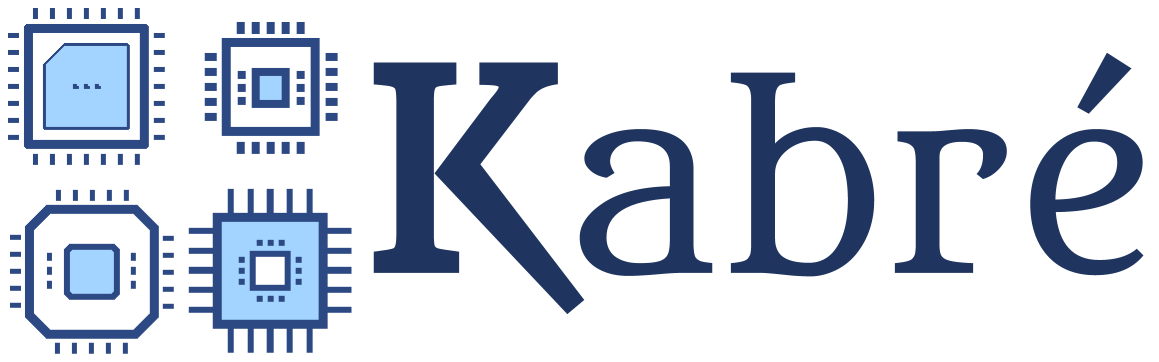


### Testing your credentials

Before proceding, this is a good moment to test your credentials. Open your terminal emulator program and type the following, changing *user_name* for your Kabre user name. If you are in a \*nix environment, you can simply execute the cell, a dialog box will open, requesting your password, if everything is OK, the number in the left (the one around [ ]) should increase in one and a message in red should appear, telling `"Pseudo-terminal will not be allocated because stdin is not a terminal."` 

Sections ahead, we will explain how to setup ssh keys to avoid typing your password everytime you log into Kabré. 

In [ ]:
%%bash
ssh user_name@cluster.cenat.ac.cr
exit

## Understanding Kabré's composition

The following image shows a network diagram of Kabré. We will discuss about the mayor components in the diagram. 

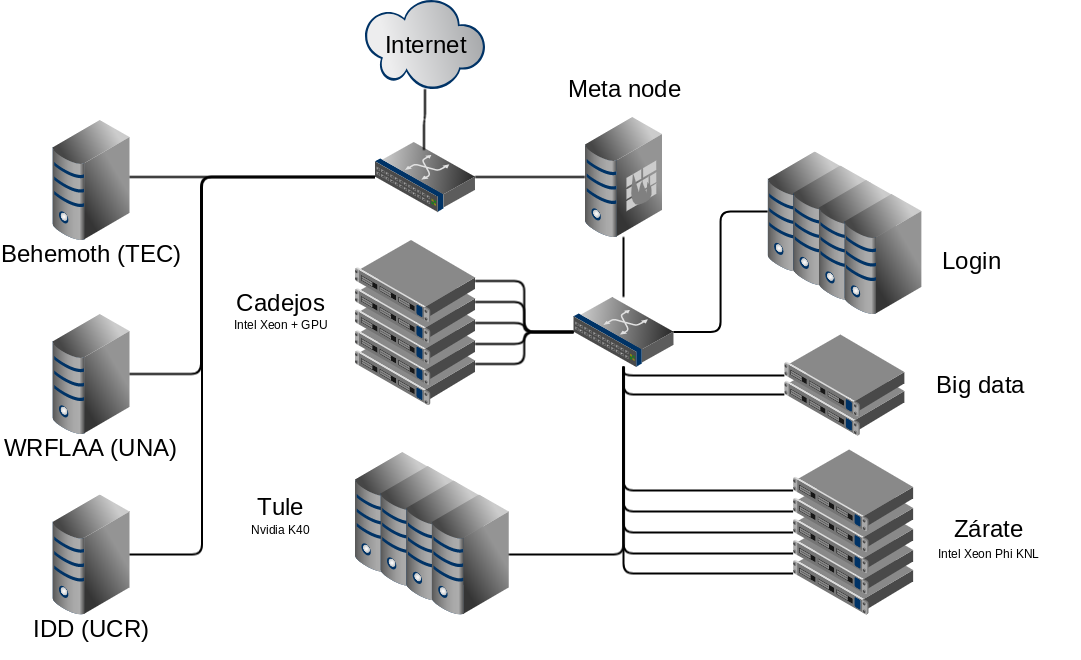

 ### Meta node
 
 This is a very special node, it supports many services of the cluster. Its existence should be transparent for all users. If, for some reason, you find yourself in Meta-node, please leave and inform that situation, it could mean a problem. Running programs in Meta-node is considered bad behavior. 
 
 ### Login-nodes
 
  These nodes are a kind of shared-working area. When you log into Kabré, you will be assigned to one login node. Some common tasks you execute here are:
 
 * Creating and editing files
 * Creating directories and moving files
 * Coping files to and from your computer
 * Compiling code
 * Submitting jobs
 * Managing your active jobs
 
Running parallel code or heavy tasks on login nodes is considered bad behavior.
 
### Cadejos Nodes
 
They are a general parallel programming platform, that means, they will fit many applicacions. Every node has 2 Intel Xeon processor, with 4 cores @ 2.4 GHz and 32 GB. Cadejos-0, cadejos-1 and cadejos-2 feature 2 Nvidia Tesla C1060 GPUs each one. 

### Tule Nodes

Each of these 4 nodes feature a Nvidia Tesla K40 GPU. The host has an Intel Xeon with 4 cores @ 3.2 GHz without hyperthreading and 16 GB, therefore, only applications with an intensive use of GPUs would get a relevant speed-up. 

### Zárate Nodes

The war horse of Kabré. 20 Intel Xeon Phi KNL nodes, each one with 64 cores @ 1.3 GHz and 96 GB; each core has two AVX units. If your application can be splitted in many smalls pieces and use vectorization, this architecture can provide impressive speed ups. Node nomenclature reflects the fact that nodes are distributed in 5 blades, going from 0 to 4 and nodes a to d, for example: zarate-0c means node `c` in blade 0, zarate-3a means node `a` in blade 3. 

### Big Data Nodes

They are an experimental platform, if you have applications that can be considered *big data*, please contact msanchez@cenat.ac.cr

### Behemoth, WRFLAA and IDD

These nodes belong to different academic units in universities of CONARE, they are administrated by CNCA. If you have questions regarding these nodes, please contact wvillalobos@cenat.ac.cr 


## Interacting with Kabré

In this section we will cover ssh connections, ssh keys, and how to copy files. 

### SSH connections and SSH Keys


To start, open a terminal emulator and open a ssh session by typing

Remember to change *user* with your user name. Type your password when prompted. You will be logged to some login node. This is a typical linux terminal, so, try out some known commands, like ``ls``, ``cd``, ``mkdir`` and so on. 

Commonly, you will be using the same computer to interact with Kabré, your laptop or workstation, for example. A SSH Key is a *file* that will keep your connection secure while avoiding typing your password everytime you log in. To generate one, in your local computer (laptop, workstation...) open a terminal, go to your home directory and type 

and follow the instructions. If you chose default options, the new key will be in ~/.ssh/, now you have to copy the public key to Kabré, to do so type 

Now, within a ssh session in Kabré, type

Alternatively, you may execute this procedure in a single command if it is available in your working station.

Now, if you open a new terminal and type ``ssh your_user@cluster.cenat.ac.cr`` you will be logged without prompting for the password. This is because Kabré has the public key of your computer. It is also convenient for your computer to have the public key of Kabré, simply append it to ``autorized_keys`` in your local computer. 

### Copy files between your computer and Kabré


The command ``scp`` is similar to ``cp`` command, it copies files from origin to destiny through a SSH session. It has the following syntax:

Default values are 
 * user: your local user
 * host: local host
 * path: current working directory

scp must be executed on your local machine, not in Kabré. Maybe your application generates a lot of visualization files and you want to download those files to your computer, remember that ``~`` means home directory and ``*`` matches any sequence of characters:

Or maybe you want to upload a parameters file to use in a simulation:

## Understanding Kabré's queues system

Login nodes are suitable for light task, as mentioned before: editing files, compiling, copying files, and similars. Heavy tasks are expected to run on Cadejos, Zarate or Tule nodes. To enforce a fair sharing of resources among users, your task should be submitted to a queues system. It is like forming up at the bank, once your task makes its way to the head of the line, it will be granted all requested resources an will run until completition or until it consumes its time slot.  

Currently, there are different queues for every component in Kabré, that means you cannot mix Tule nodes and Zarate nodes in a single job, for example. The following table shows all availble queues:

| Name | Platform | Number of nodes | Time slot (in hours) |
|:----:|:--------:|:---------------:|:--------------------:|
| cpu-n3h72 | Cadejos | 3 | 72 |
| cpu-n4h24 | Cadejos | 4 | 24 |
| cpu-n5h24 | Cadejos | 5 | 24 |
| cpu-debug | Cadejos | 1 | 0.5 |
| gpu-n1h72 | GPU @ Cadejos or Tule | 1 | 72 |
| gpu-n2h24 | GPU @ Cadejos or Tule | 2 | 24 |
| gpu-debug | GPU @ Cadejos or Tule | 1 | 0.5 |
| k40 | GPU @ Tule | 4 | 2 |
| phi-n1h72 | Xeon Phi KNL  | 1 | 72 |
| phi-n2h72 | Xeon Phi KNL  | 2 | 72 |
| phi-n3h24 | Xeon Phi KNL  | 3 | 24 |
| phi-n5h24 | Xeon Phi KNL  | 5 | 24 |
| phi-n6h24 | Xeon Phi KNL  | 6 | 24 |
| phi-n6h96 | Xeon Phi KNL  | 6 | 96 |
| phi-debug | Xeon Phi KNL  | 1 | 0.5 |
| debug | All platforms | 29 | 0.5 |

The process of submitting a job in Kabré could be divided in four steps: writting a PBS file, queueing your job, monitoring jobs and retrieving results. 


### Writing a PBS file

This configuration file tells the queue system all it needs to know about your job, so it can be placed in the right queue and executed. Lets try it out with a minimun working example. Below is a C code that approximates the value of pi using a Montecarlo method. Log into Kabré, copy the text to a file and save it with name pi_threads.c . 

Currently, you are in a login node, so it is OK to compile the code there, do so by typing:

The following is an example PBS file. All lines starting with `#PBS` are configuration commands for the queues system. Options shown are the most common, and possibly the only ones you will need. The body of a PBS file is bash code. Copy the example in a file named `pi_threads.pbs` 

| Configuration | Description |
|:-------------:|:-----------:|
| -N | Specify the job's name  |
| -q | In which queue should it run |
| -l nodes | Requested number of nodes |
| :ppn     | Process per node |
| -l walltime | Approximate job's duration |

Now, from the command line, invoke the queues submitter: 

And that's all! Your job will be queued and executed, in this case, on a Xeon Phi node. 

### Monitoring your active jobs

A pasive way of monitoring your jobs is to indicate PBS to send an email when done. This can be configured in the PBS file using the -m option, as shown below. `b` means *begin*, `e` means *end* and `a` means *abort*. 

If your job lasts only a few minutes, you can actively monitor its progress with `qstat` command:

This will execute `qstat` command every 5 seconds. Your job will appear with the name specified in the PBS file. This method requires to keep open a ssh session in Kabré. If you want to check your job's progress with your cellphone or other device without opening an ssh connection, CeNAT has a webpage that runs qstat command every 5 seconds and shows its output. Just go to [cluster.cenat.ac.cr/torquitor](http://cluster.cenat.ac.cr/torquitor/).

### Retrieving results

By default, every job will generate two output files, corresponding to standard output and standard error, following the name convention below:

You can copy those files to your local computer o run another script for post-processing the output. 

### Interactive jobs

Sometimes you want to have direct access to some node. Using ssh directly is a bad practice, because the queue system could send someone else's job to execute on the node you are currently using. The polite way to ask for direct access is through an interactive job. This time you don't need a PBS file, the only required information is which queue you want to use. For example:

starts an interactive job in some Zarate node. Interactive jobs are allowed in debug queues only. The next command opens an interactive job on a Tule or Cadejos node and reserves a GPU for your use:

## Environment modules

Different users have different needs, sometimes those needs could be conflincting, for example, multiple versions of the same library or compiler. These situations are solved with environment modules. A typical case is different versions of Python. To exemplify, open a ssh session in Kabré and request an interactive job in phi queue: 

This should return you a bash prompt in some Zárate node. By the way, this is the only acceptable way to access other nodes but logins. Now, go ahead and type `python`, you should get into the default python interpreter. The header should be like this:

Besides the default interpreter, you can execute Intel Distribution for Python, a specifically tunned compilation with packages commonly used in scientific computing. To get Intel python, type

Now, type again `python`, you will get a different header:

To check which modules are already loaded, type

To get a list of all available modules, type

Behind scenes, module command is just configuring paths, aliases and other environment variables, so, modules are loaded only for the current shell session. You can request specific modules in you jobs, just add `"module load module_name"` lines to PBS file body, below all `#PBS` lines and before runing your program. 